<a href="https://colab.research.google.com/github/ManojKumarTiwari/Pytorch/blob/master/pytorch_the_gist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## We will keep things very practical and hence the audience is execpted to have basic knowledge about Python, Machine learning and Deep Learning.

- NOTE: This notebook is closely based on the book Deep Learning with Pytorch (2020)
- NOTE: Books code along [repo](https://github.com/deep-learning-with-pytorch/dlwpt-code)

## What is Pytorch
- Pytorch is a python deep learning library
- Mainly written in C++ which makes it faster in performance(added advantage in deployment stratergies)
- and CUDA which makes it massively parallelisable on GPUs
- but we mostly use PyTorch from Python for building models, training them, and using the trained models to solve actual problems.
- For more details. [click here](https://pytorch.org/)

## Why Pytorch
- It’s Pythonic
- Core Data Structure is Tensor
- accelerated computation using GPUs
- support numerical optimization on generic mathematical expressions


## Basic Pytorch API breakdown
So we know basic data structure is Tensor
- numerical operatation - torch module
	- audogard (to keep track of mathematical operations for graidents)
- building Neraul Networks - torch.nn
	- functions for Neraul Networks - torch.nn.functional
- Converting our custom data(input/prelim-preprocessed) to Pytorch Tensor - Dataset class in torch.utils.data package
- dataset in Batches - Dataloader
- More on Dataset and Dataloader later
- Optimizers are provided in - torch.optim

for distirbuted system(multiple GPUs or Multiple Machines)
- torch.nn.parallel.DistributedDataParallel
- torch.distributed

for more details refer [Pytorch Doc](https://pytorch.org/docs/stable/index.html)

## Bonus-
- TorchScript pre comipled models used Can be used .

-Hardware and Software
  - CPU, GPU

    Note: MacOS only CPU

- Different Benchmarks

https://dawn.cs.stanford.edu/benchmark/index.html


- how fast
- cost of running on cloud etc etc

In [1]:
import torch
from torchvision import models

## Pytorch Libraries
Now just tensorflow, keras, fastai etc Pytorch also has some inbuilt library for prominent Deep Learning applications like NLP, Computer Vision, Speech

- [Docs](https://pytorch.org/docs/stable/index.html)
- [Github](https://github.com/pytorch)

We will now see how to use these libraries. I will use torchvision library for demonstartion purposes but you can use any other library.

In [ ]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [ ]:
!wget https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/bobby.jpg

--2020-07-08 15:38:43--  https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/bobby.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75801 (74K) [image/jpeg]
Saving to: ‘bobby.jpg’

bobby.jpg           100%[===================>]  74.02K  --.-KB/s    in 0.03s   

2020-07-08 15:38:43 (2.41 MB/s) - ‘bobby.jpg’ saved [75801/75801]



In [ ]:
from PIL import Image

In [ ]:
alexnetClass = models.AlexNet()

In [ ]:
IMG_PATH = "/content/bobby.jpg"
img_p = Image.open(IMG_PATH)

In [ ]:
type(img_p)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img_p.show()

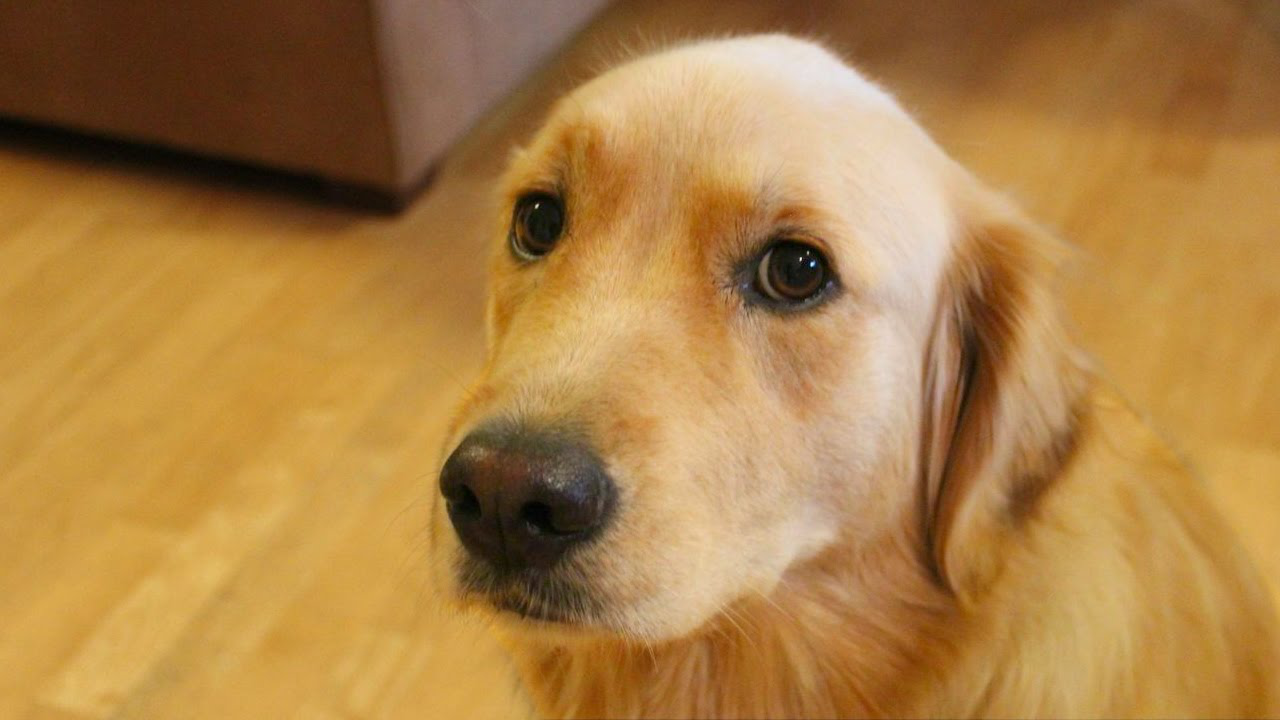

In [ ]:
img_p

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
img_a_mp = mpimg.imread(IMG_PATH)

In [ ]:
type(img_a_mp)

numpy.ndarray

In [ ]:
img_a_mp.shape

(720, 1280, 3)

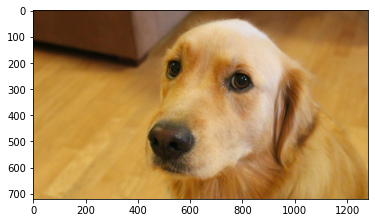

In [ ]:
plt.imshow(img_a_mp)

In [ ]:
import cv2

In [ ]:
img_a = cv2.imread(IMG_PATH)

In [ ]:
type(img_a)

numpy.ndarray

In [ ]:
img_a.shape

(720, 1280, 3)

In [ ]:
#cv2.imshow(img)
from google.colab.patches import cv2_imshow

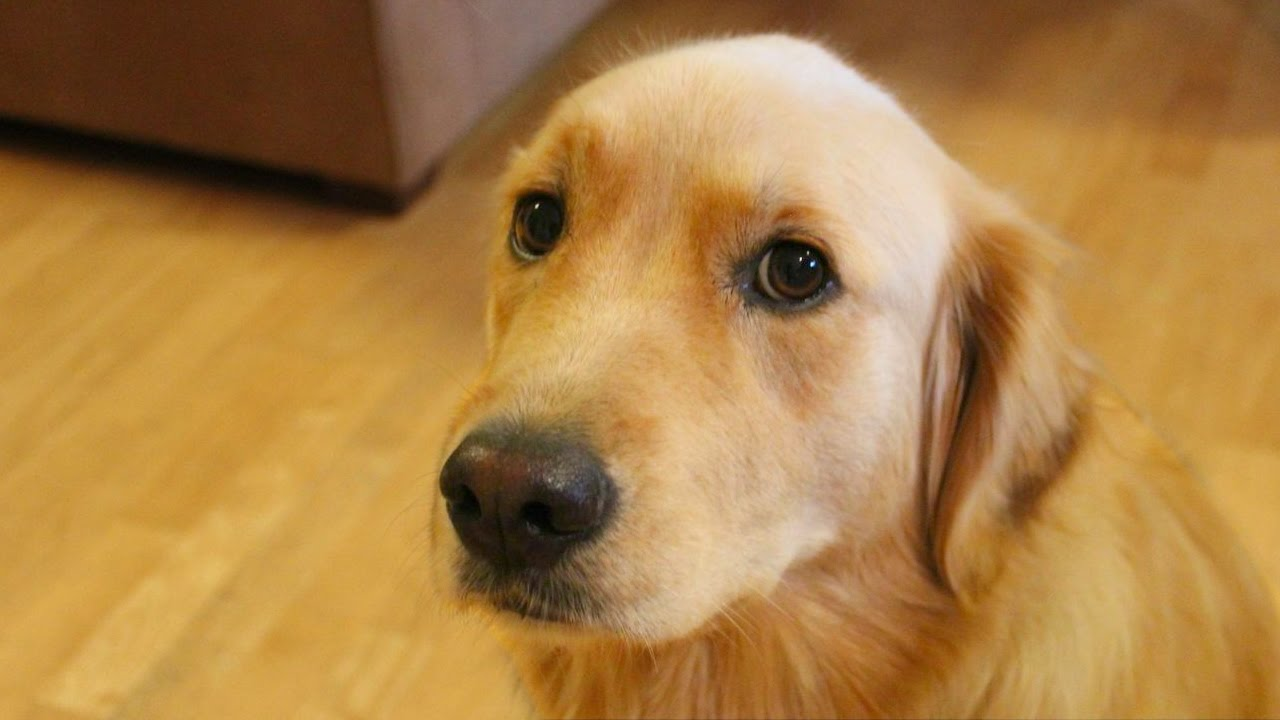

In [ ]:
cv2_imshow(img_a)

In [ ]:
alexnetClass(img)

TypeError: ignored

In [ ]:
alexnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


In [ ]:
from torchvision import transforms

In [ ]:
preprocess = transforms.Compose([
                                 transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]
                                 )
])

In [ ]:
img_t = preprocess(img_p)

In [ ]:
type(img_t)

torch.Tensor

In [ ]:
img_t.shape

torch.Size([3, 224, 224])

In [ ]:
img_a_mp_t = preprocess(img_a_mp)

TypeError: ignored

In [ ]:
img_a_t = preprocess(img_a)

TypeError: ignored

In [ ]:
import torch

In [ ]:
batch_t = torch.unsqueeze(img_t, 0)

In [ ]:
batch_t.shape

torch.Size([1, 3, 224, 224])

In [ ]:
resnet = models.resnet101(pretrained=True)

In [ ]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
224*224

50176

In [ ]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
!wget https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/imagenet_classes.txt --output-file imagenet_classes.txt

In [ ]:
pred = resnet(batch_t)

In [ ]:
pred

tensor([[-3.4803e+00, -1.6618e+00, -2.4515e+00, -3.2662e+00, -3.2466e+00,
         -1.3611e+00, -2.0465e+00, -2.5112e+00, -1.3043e+00, -2.8900e+00,
         -1.6862e+00, -1.3055e+00, -2.6129e+00, -2.9645e+00, -2.4300e+00,
         -2.8143e+00, -3.3019e+00, -7.9404e-01, -6.5182e-01, -1.2308e+00,
         -3.0193e+00, -3.9457e+00, -2.2675e+00, -1.0811e+00, -1.0232e+00,
         -1.0442e+00, -3.0918e+00, -2.4613e+00, -2.1964e+00, -3.2354e+00,
         -3.3013e+00, -1.8553e+00, -2.0921e+00, -2.1327e+00, -1.9102e+00,
         -3.2403e+00, -1.1396e+00, -1.0925e+00, -1.2186e+00, -9.3332e-01,
         -4.5093e-01, -1.5489e+00,  1.4161e+00,  1.0871e-01, -1.8442e+00,
         -1.4806e+00,  9.6227e-01, -9.9456e-01, -3.0060e+00, -2.7384e+00,
         -2.5798e+00, -2.0666e+00, -1.8022e+00, -1.9328e+00, -1.7726e+00,
         -1.3041e+00, -4.5848e-01, -2.0537e+00, -3.2804e+00, -5.0451e-01,
         -3.8174e-01, -1.1147e+00, -7.3998e-01, -1.4299e+00, -1.4883e+00,
         -2.1073e+00, -1.7373e+00, -4.

In [ ]:
pred.shape

torch.Size([1, 1000])

In [ ]:
_, index = torch.max(pred, 1)

In [ ]:
index[0]

tensor(207)

In [ ]:
import torch.nn.functional as F

In [ ]:
precentage = F.softmax(pred, dim=1)[0] * 100

In [ ]:
with open("/content/imagenet_classes.txt") as f:
  labels = [line.strip() for line in f.readlines()]

In [ ]:
labels

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree frog, tree-f

In [ ]:
labels[index[0]], precentage[index[0]].item()

('golden retriever', 96.29335021972656)

In [ ]:
_, indices = torch.sort(pred, descending=True)

In [ ]:
indices

tensor([[207, 208, 219, 168, 852, 205, 213, 162, 539, 215, 220, 434, 159, 212,
         231, 214, 165, 227, 263, 216, 176, 222, 805, 175, 211, 218, 209, 257,
         244, 154, 164, 552, 230, 411, 700, 161, 273, 999, 260, 163, 206, 185,
         793, 184, 238, 160, 931, 239, 166, 589, 232, 259, 736, 543, 264, 929,
         234, 266, 879, 167, 204, 752, 192, 200, 251, 223, 478, 256, 182, 240,
         882, 705, 998, 267, 534, 414, 452, 813, 515, 170, 799, 765, 767, 638,
         961, 415, 797, 191, 578, 757, 785, 904, 156, 236, 868, 641, 722, 235,
         659, 247, 990, 876, 428, 462, 193, 750, 910, 197, 217, 673, 828, 591,
         549, 735, 808, 226, 202, 248, 178, 463, 574, 948, 221, 265, 776, 618,
         255, 241, 898, 151, 987, 811, 789, 433, 201, 761, 731, 496, 779, 939,
         472, 153, 579, 158, 522, 429, 740, 448, 558, 693, 502, 676, 177, 189,
         615, 930, 840, 224, 559, 947, 196, 824, 774, 733, 246, 443, 293, 953,
         171, 519, 210, 249, 655, 253, 180, 199, 508

In [ ]:
[(labels[idx], precentage[idx].item()) for idx in indices[0][: 5]]

[('golden retriever', 96.29335021972656),
 ('Labrador retriever', 2.808121681213379),
 ('cocker spaniel, English cocker spaniel, cocker', 0.28267404437065125),
 ('redbone', 0.20863023400306702),
 ('tennis ball', 0.11621593683958054)]

In [ ]:
##############################################################################################

In [ ]:
import torch
from torchvision import transforms

def single_img_preprocess(pil_img):
  """
  This function proprocess the PIL image file to feed to Resnet Model.

  Params:
  -------
  pil_img: should be a variable having PIL image.

  Output:
  -------
  returns Image tensor that can be feed to Resnet Model
  """
  preprocess = transforms.Compose([
                                   transforms.Resize(256),
                                   transforms.CenterCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize(
                                       mean=[0.485, 0.456, 0.406],
                                       std=[0.229, 0.224, 0.225]
                                   )
  ])

  img_t = preprocess(pil_img)
  return torch.unsqueeze(img_t, 0) 

In [ ]:
img_t = single_img_preprocess(img_p)

In [ ]:
img_t.shape

torch.Size([1, 3, 224, 224])

In [ ]:
from torchvision import models

def get_model():
  resnet = models.resnet101(pretrained=True)
  return resnet.eval()

In [ ]:
model = get_model()

In [ ]:
pred = model(img_t)

In [ ]:
pred

tensor([[-3.4803e+00, -1.6618e+00, -2.4515e+00, -3.2662e+00, -3.2466e+00,
         -1.3611e+00, -2.0465e+00, -2.5112e+00, -1.3043e+00, -2.8900e+00,
         -1.6862e+00, -1.3055e+00, -2.6129e+00, -2.9645e+00, -2.4300e+00,
         -2.8143e+00, -3.3019e+00, -7.9404e-01, -6.5182e-01, -1.2308e+00,
         -3.0193e+00, -3.9457e+00, -2.2675e+00, -1.0811e+00, -1.0232e+00,
         -1.0442e+00, -3.0918e+00, -2.4613e+00, -2.1964e+00, -3.2354e+00,
         -3.3013e+00, -1.8553e+00, -2.0921e+00, -2.1327e+00, -1.9102e+00,
         -3.2403e+00, -1.1396e+00, -1.0925e+00, -1.2186e+00, -9.3332e-01,
         -4.5093e-01, -1.5489e+00,  1.4161e+00,  1.0871e-01, -1.8442e+00,
         -1.4806e+00,  9.6227e-01, -9.9456e-01, -3.0060e+00, -2.7384e+00,
         -2.5798e+00, -2.0666e+00, -1.8022e+00, -1.9328e+00, -1.7726e+00,
         -1.3041e+00, -4.5848e-01, -2.0537e+00, -3.2804e+00, -5.0451e-01,
         -3.8174e-01, -1.1147e+00, -7.3998e-01, -1.4299e+00, -1.4883e+00,
         -2.1073e+00, -1.7373e+00, -4.

In [ ]:
with open("/content/imagenet_classes.txt") as f:
  labels = [line.strip() for line in f.readlines()]

In [ ]:
_ , index = torch.max(pred, dim=1)

In [ ]:
index

tensor([207])

In [ ]:
index[0]

tensor(207)

In [ ]:
from torch.nn import functional as F

percentage = F.softmax(pred, dim=1)[0] * 100

In [ ]:
labels[index[0]], precentage[index[0]].item()

('golden retriever', 96.29335021972656)

In [ ]:
_ , indices = torch.sort(pred, descending=True)

In [ ]:
[(labels[idx], precentage[idx]) for idx in indices[0][:5]]

[('golden retriever', tensor(96.2934, grad_fn=<SelectBackward>)),
 ('Labrador retriever', tensor(2.8081, grad_fn=<SelectBackward>)),
 ('cocker spaniel, English cocker spaniel, cocker',
  tensor(0.2827, grad_fn=<SelectBackward>)),
 ('redbone', tensor(0.2086, grad_fn=<SelectBackward>)),
 ('tennis ball', tensor(0.1162, grad_fn=<SelectBackward>))]

# Tensors

## [Named Tensors](https://pytorch.org/docs/master/named_tensor.html#)


## Tensors Element Type
-  "dtype" argument to tensor constructors (that is, functions like tensor, zeros, and ones) specifies the type of data that tensor will have.
- it is very consistent with Numpy's dtype.

- torch.float32 or torch.float: 32-bit floating-point 
- torch.float64 or torch.double: 64-bit, double-precision floating-point 
- torch.float16 or torch.half: 16-bit, half-precision floating-point 
- torch.int8: signed 8-bit integers 
- torch.uint8: unsigned 8-bit integers 
- torch.int16 or torch.short: signed 16-bit integers 
- torch.int32 or torch.int: signed 32-bit integers 
- torch.int64 or torch.long: signed 64-bit integers 
- torch.bool: Boolean

Note: default dtype is float32

In [ ]:
x_ints = torch.tensor([1,2,3]) # Notice I am passing integers
x_ints.dtype # Hence we get dtype as torch.int64

torch.int64

In [ ]:
x_floats = torch.tensor([2.,3.,7,]) # Notice I am passing floats
x_floats.dtype # Hence dtype is torch.float32

torch.float32

In [ ]:
x_ones_int = torch.ones((2,2), dtype=torch.int) # specifying the dtype explicitly
x_ones_int

tensor([[1, 1],
        [1, 1]], dtype=torch.int32)

### Casting

In [ ]:
x_floats_to_int = x_floats.int() # first way 
x_floats_to_int 

tensor([2, 3, 7], dtype=torch.int32)

In [ ]:
x_ints_to_float = x_ints.to(torch.float) # second way
# x_ints_to_float = x_ints.to(dtype=torch.float) # same thing
x_ints_to_float

tensor([1., 2., 3.])

In [ ]:
y_float16 = torch.tensor([3.,6.,7.], dtype=torch.float16)

In [ ]:
sum = x_floats + y_float16 # implicit type conversion to higher order type 
sum.dtype 

torch.float32

## Tensor API
- functions and methods 
-  the tensor operations divided into groups


- Creation ops—Functions for constructing a tensor, like ones and from_numpy 
- Indexing, slicing, joining, mutating ops—Functions for changing the shape, stride, or content of a tensor, like transpose 
- Math ops—Functions for manipulating the content of the tensor through computations 
  - Pointwise ops—Functions for obtaining a new tensor by applying a function to each element independently, like abs and cos 
  - Reduction ops—Functions for computing aggregate values by iterating through tensors, like mean, std, and norm 
  - Comparison ops—Functions for evaluating numerical predicates over tensors, like equal and max 
  - Spectral ops—Functions for transforming in and operating in the frequency domain, like stft and hamming_window 
  - Other operations—Special functions operating on vectors, like cross, or matrices, like trace 
  - BLAS and LAPACK operations—Functions following the Basic Linear Algebra Subprograms (BLAS) specification for scalar, vector-vector, matrix-vector, and matrix-matrix operations 
- Random sampling—Functions for generating values by drawing randomly from probability distributions, like randn and normal 
- Serialization—Functions for saving and loading tensors, like load and save 
- Parallelism—Functions for controlling the number of threads for parallel CPU execution, like set_num_threads 

## go to the [docs](https://pytorch.org/docs/stable/torch.html#)
- and explore the functions and fimiliarize those functions. 
It is an exhaustive list.

- Note: We don't need to memorize them.

## Tensor Storage

### What actually happens when you create a tensor

- Values in tensors are allocated in contiguous chunks of memory managed by torch.Storage instances. A storage is a one-dimensional array of numerical data: that is, a contiguous block of memory containing numbers of a given type

- So the advanatage of this is, a new memory alloaction doesn't happen even when you change the shape of a given tensor, because it points to the same storage. Not only that it uses others tensors also for reference if avaialble instead of alloacting new memory.

- we can access the memory block for a given tensor and even modify it. below is the example.

In [ ]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points.storage() # accessing the memory storage

 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.FloatStorage of size 6]

In [ ]:
points.storage()[1] # accessing the 2nd element in the storage (remember the indexing starts from 0)

1.0

In [ ]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points_storage = points.storage()
points_storage[0] = 2.0 # changing the value in storage
points # changes the value in tensor

tensor([[2., 1.],
        [5., 3.],
        [2., 1.]])

In [ ]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points_storage = points.storage()
points_T = points.transpose(0,1)
points_storage_T = points_T.storage()
points_storage_T[1] = 99.0
points_storage, points_storage_T

( 4.0
  99.0
  5.0
  3.0
  2.0
  1.0
 [torch.FloatStorage of size 6],  4.0
  99.0
  5.0
  3.0
  2.0
  1.0
 [torch.FloatStorage of size 6])

### In-place operations
- there are some operations exist only as methods of the Tensor object and modifies the tensor in place.
- the have the systax functionname_ example zero_, ones_

In [ ]:
ones = torch.ones(2,2)
ones

tensor([[1., 1.],
        [1., 1.]])

In [ ]:
ones.zero_() # inplace operation

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
ones # modified ones tensor

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]]) 
second_point = points[1] 
second_point.storage_offset()

2

## Tensors on GPUs

In [ ]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]]) # Creating tensor on CPU

In [ ]:
points_gpu = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]], device='cuda') # Creating tensor on GPU

In [ ]:
points_gpu1 = points.to(device='cuda') # copying tensor from CPU to GPU

In [ ]:
# points_gpu2 = points.to(device='cuda:0') # if you have multiple GPUs you can access by indexing starting from 0

In [ ]:
mul = 2 * points_gpu # operating on GPUs

In [ ]:
mul = mul.to(device='cpu') # copying/moving to CPU

In [ ]:
### Shorthands for the above task
points_gpu = points.cuda() # defaults to 0
points_gpu = points.cuda(0) 
points_cpu = points_gpu.cpu()

## NumPy interoperability 

In [2]:
points = torch.ones(3,2)

In [4]:
points_np = points.numpy() # convert to numpy array
points_np

array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)

In [7]:
points = torch.from_numpy(points_np) # convert from numpy to torch tensor
points

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [8]:
# Note: default dtype of numpy is float64, and we usually want float32 tensor, so always change the dtype when converting tensor from numpy

## Serializing tensors

In [9]:
points = torch.ones(3,2)

In [11]:
# save (pickle backend)
torch.save(points, 'points.t') 

In [14]:
with open('points1.t', 'wb') as f:
  torch.save(points, f)

In [15]:
# load
points = torch.load('/content/points.t')

In [16]:
points

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [17]:
with open('points1.t', 'rb') as f:
  points1 =torch.load('/content/points1.t')

In [18]:
points1

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [ ]:
# Serializing to HDF5 with h5py 

In [19]:
import h5py

# save
f = h5py.File('ourpoints.hdf5', 'w')
dset = f.create_dataset('coords', data=points.numpy())
f.close()

In [20]:
# load
f = h5py.File('/content/ourpoints.hdf5', 'r')
dset = f['coords']
last_points = dset[-2:]

## Practise3

In [21]:
a = torch.tensor(list(range(9)))

In [22]:
a

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [23]:
a.shape

torch.Size([9])

In [25]:
a.size()

torch.Size([9])

In [30]:
a.storage_offset()

0

In [31]:
a.stride()

(1,)

In [24]:
a_storage = a.storage()

In [28]:
a_storage.size()

9

In [29]:
a_storage

 0
 1
 2
 3
 4
 5
 6
 7
 8
[torch.LongStorage of size 9]

In [33]:
b = a.view(3, 3)
# view() is used to reshape the tensor
b

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [34]:
id(b.storage) == id(a.storage) # check if they 

True

In [40]:
b.stride()

(3, 1)

In [35]:
c = b[1:, 1:]

In [36]:
c.size()

torch.Size([2, 2])

In [37]:
c.storage_offset()

4

In [39]:
c.stride()

(3, 1)

In [43]:
torch.sqrt(a.float())

tensor([0.0000, 1.0000, 1.4142, 1.7321, 2.0000, 2.2361, 2.4495, 2.6458, 2.8284])